# EDA of Claim Dataaset
# 02_EDA_Claim

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 24/09/2025 | Adrienne | Created   | Created to do EDA for Claim Dataset | 
| 27/09/2025 | Adrienne | Updated | Added code from Martin |
| 13/10/2025 | Martin | Updated | Code cleanup |

# Content

* [Load Data](#load-data)
* [Data Exploration](#data-exploration)
  * [Observations on Code List](#observations-on-code-lists)
  * [Observations on Percentage of Values](#observations-on-percentage-of-values)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statistics

## Load Data

In [ ]:
# readin clean datafiles
path = "../data/clean/"
claim_df =  pd.read_pickle(path + 'claim.pkl')

In [10]:
# readin secondary datasets
mapper_path = "../data/mappers/"
drg_df = pd.read_pickle(mapper_path + 'drg.pkl') 
hcpcs_df = pd.read_pickle(mapper_path + 'hcpcs.pkl')
icd10_df = pd.read_pickle(mapper_path + 'icd10.pkl')

In [54]:
# Additional preprocessing
icd10_df = icd10_df.rename({
  "SHORT DESCRIPTION (VALID ICD-10 FY2025)": "SHORT DESCRIPTION"
}, axis=1)

## Data Exploration

### Observations on Code Lists

<u>Findings</u>

- ICD-10 codes are in almost all claims
- ~56% of ICD-10 lists are length 1 or 2 in length
- HCPCS list that we currently have is just the HCPCS level II codes.  Need to get level I and combine

### ICD-10

In [16]:
print(f"Number of non-NaN ICD10 entries: {claim_df.shape[0] - claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN ICD10 entries: 9984 out of 10000


In [17]:
non_na_icd10 = claim_df[~claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]
non_na_icd10['ls_len'] = non_na_icd10['diagnosis_ls'].str.len()
non_na_icd10['first_icd10'] = non_na_icd10['diagnosis_ls'].str[0]

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/1123325870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_icd10['ls_len'] = non_na_icd10['diagnosis_ls'].str.len()
/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/1123325870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_icd10['first_icd10'] = non_na_icd10['diagnosis_ls'].str[0]


In [18]:
na_icd10 = claim_df[claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]

Text(0.5, 0, 'Count')

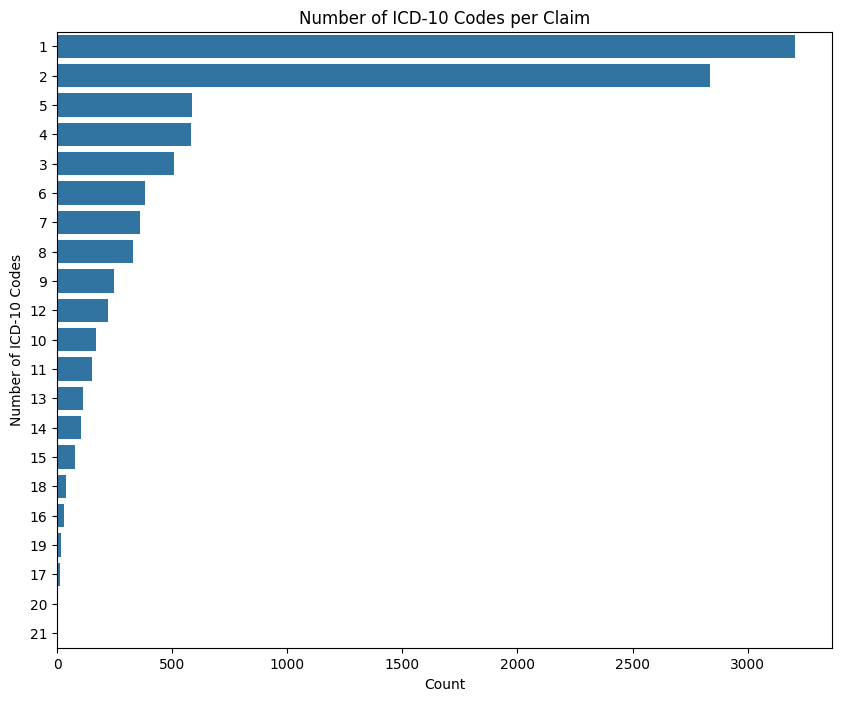

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='ls_len', data=non_na_icd10, order=non_na_icd10['ls_len'].value_counts().index)
ax.set_title("Number of ICD-10 Codes per Claim")
ax.set_ylabel("Number of ICD-10 Codes")
ax.set_xlabel("Count")

In [24]:
len_one_and_two = len(non_na_icd10[non_na_icd10['ls_len']== 1]) + len(non_na_icd10[non_na_icd10['ls_len']== 2])
print(f"Number of claims with 1 and 2 ICD-10 Codes: {len_one_and_two}")

Number of claims with 1 and 2 ICD-10 Codes: 6042


In [25]:
def count_icd10(length):
  return len(non_na_icd10[non_na_icd10['ls_len'] == length])

In [28]:
lengths = [11, 19, 21, 22, 23]
for i in lengths:
  print(f"Number of claims with {i} ICD-10 Codes: {count_icd10(i)}")

Number of claims with 11 ICD-10 Codes: 151
Number of claims with 19 ICD-10 Codes: 16
Number of claims with 21 ICD-10 Codes: 2
Number of claims with 22 ICD-10 Codes: 0
Number of claims with 23 ICD-10 Codes: 0


### HCPCS

In [29]:
print(f"Number of non-NaN HCPCS entries: {claim_df.shape[0] - claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN HCPCS entries: 5158 out of 10000


In [30]:
non_na_hcpcs = claim_df[~claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0)]
non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()
non_na_hcpcs['first_hcpcs'] = non_na_hcpcs['hcpcs_ls'].str[0]

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/3941366260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()
/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/3941366260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['first_hcpcs'] = non_na_hcpcs['hcpcs_ls'].str[0]


Text(0.5, 0, 'Count')

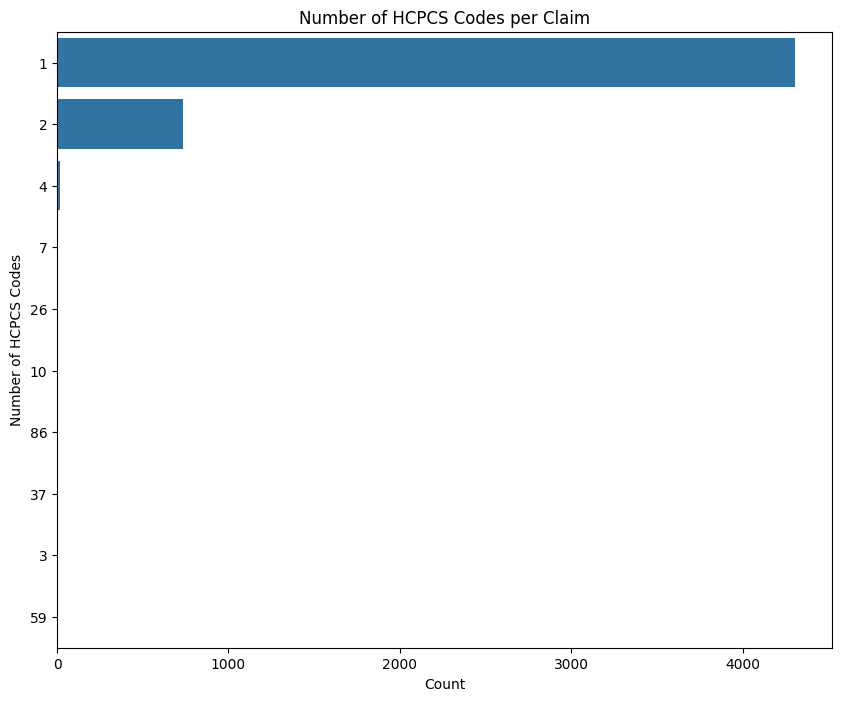

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
ls= non_na_hcpcs['ls_len'].value_counts().head(10)
sns.countplot(y='ls_len', data=non_na_hcpcs, order=ls.index)
ax.set_title("Number of HCPCS Codes per Claim")
ax.set_ylabel("Number of HCPCS Codes")
ax.set_xlabel("Count")

In [43]:
print(f"Min length: {non_na_hcpcs['ls_len'].min()}")
print(f"Max length: {non_na_hcpcs['ls_len'].max()}")
print(f"Median length: { statistics.median(non_na_hcpcs['ls_len'])}")

Min length: 1
Max length: 337
Median length: 1.0


In [44]:
unique_values = set(value for sublist in claim_df['hcpcs_ls'] for value in sublist)
print(unique_values)
print(f"Number of unqiue HCPCS in all claims: {len(unique_values)}")

{'G9857', 'G8111', 'Q5001', 'G0155', 'G0444', 'G9572', 'G0152', 'H2000', 'G0154', 'S9126', 'G0299', 'S0605', 'G0424', 'G9833', 'G9858', 'G0107', 'G0129', 'G9708', 'S8075', 'G0153', 'G9573', 'G0157', '00777310502', 'G0156', 'S9473', 'S9129', 'G0151', 'G9829', 'S9131', 'G0464', 'G0402', 'I3C', '99241', 'G0300', 'C8908', 'T1021', '99221', 'T1502', 'G8946', 'S9122', 'G0158'}
Number of unqiue HCPCS in all claims: 41


In [45]:
unique_ls = list(unique_values)
un_df = pd.DataFrame({'list_col' : unique_ls})
df = pd.merge(un_df, hcpcs_df, how = 'left',left_on='list_col', right_on= 'Code')
df.head(40)

,list_col,Code,Description
0,G9857,G9857,Patient admitted to hospice\nTerminated Decemb...
1,G8111,NaN,NaN
2,Q5001,Q5001,Hospice or home health care provided in patien...
3,G0155,G0155,Services of clinical social worker in home hea...
4,G0444,G0444,"Annual depression screening, 5 to 15 minutes"
5,G9572,G9572,Index date phq-score greater than 9 documented...
6,G0152,G0152,Services performed by a qualified occupational...
7,H2000,H2000,Comprehensive multidisciplinary evaluation
8,G0154,G0154,Direct skilled nursing services of a licensed ...
9,S9126,S9126,"Hospice care, in the home, per diem"


### Observations on Percentage of Values

<u>Findings</u>

- ICD-10 list is not complete.  About a third of codes aren't merging with a description
- 92.5% of all claims have no HCPCS in procedure list.  The ones that are in there do not merge with a description
- DRG code list is complete enough.  There are some that did not merge with a description
- 77% of claims are institutional which are inpatient and outpatient services provided by a healthcare facility like a hospital
- There are HCPCS codes that are 11 in length that make up 12.175262% of the data which are actually national drug codes (NDC).  There are codes that are 3 in length that make up 0.155099% of the data all with value I3C.

### ICD-10

In [46]:
# Percentage breakdown
vals = non_na_icd10['diagnosis_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'ICD10_breakdown': vals
}).head(20)

,ICD10_breakdown
diagnosis_ls,
[E669],5.649038
[D649],2.914663
[E785],2.864583
[J329],2.504006
[R739],1.612580
[O039],1.532452
[I10],1.412260
[P292],1.302083
[E781],1.272035


In [55]:
# Percentage breakdown
vals = non_na_icd10['first_icd10'].value_counts(normalize=True) * 100
icd10_vals = vals.to_frame().reset_index()
df = pd.merge(icd10_vals, icd10_df[['CODE', 'SHORT DESCRIPTION']], how = 'left',left_on='first_icd10', right_on= 'CODE') 
df[['first_icd10', 'SHORT DESCRIPTION', 'proportion']].head(20)

,first_icd10,SHORT DESCRIPTION,proportion
0,E669,"Obesity, unspecified",15.414663
1,D649,"Anemia, unspecified",8.313301
2,J329,"Chronic sinusitis, unspecified",7.141426
3,E785,"Hyperlipidemia, unspecified",6.650641
4,E781,Pure hyperglyceridemia,5.649038
5,O039,Complete or unsp spontaneous abortion without ...,4.747596
6,R739,"Hyperglycemia, unspecified",4.647436
7,K37,Unspecified appendicitis,3.495593
8,I10,Essential (primary) hypertension,3.315304
9,P292,Neonatal hypertension,3.295272


In [56]:
df[['first_icd10', 'SHORT DESCRIPTION', 'proportion']].tail(50)

,first_icd10,SHORT DESCRIPTION,proportion
105,D4959,Neoplasm of unspecified behavior of other GU o...,0.050080
106,S060X9,NaN,0.050080
107,R0600,"Dyspnea, unspecified",0.050080
108,S2239X,NaN,0.040064
109,R0902,Hypoxemia,0.040064
110,I129,Hypertensive chronic kidney disease w stg 1-4/...,0.040064
111,U071,COVID-19,0.040064
112,J0300,"Acute streptococcal tonsillitis, unspecified",0.040064
113,J45909,"Unspecified asthma, uncomplicated",0.040064
114,S63509,NaN,0.040064


In [57]:
print(f"Number of ICD-10 codes that does not merge with a description: {len(df[ df['SHORT DESCRIPTION'].isnull() ] )} out of {len(df)}")

Number of ICD-10 codes that does not merge with a description: 32 out of 155


### HCPCS

In [58]:
# Percentage breakdown
vals = non_na_hcpcs['hcpcs_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'hcpcs_breakdown': vals
}).head(10)

,hcpcs_breakdown
hcpcs_ls,
[99241],50.697945
[G0444],19.658782
"[99241, 00777310502]",7.987592
[99221],6.320279
"[G0444, 00777310502]",2.636681
"[99221, 00777310502]",1.027530
"[G0444, G9573]",0.814269
"[G0444, G9572]",0.678558
[G8111],0.601008


In [59]:
# Percentage breakdown
vals = non_na_hcpcs['first_hcpcs'].value_counts(normalize=True) * 100
hcpcs_vals = vals.to_frame().reset_index()
df = pd.merge(hcpcs_vals, hcpcs_df, how = 'left',left_on='first_hcpcs', right_on= 'Code') 
df[['first_hcpcs', 'Description', 'proportion']].head(20)

,first_hcpcs,Description,proportion
0,99241,NaN,58.685537
1,G0444,"Annual depression screening, 5 to 15 minutes",24.001551
2,99221,NaN,7.347809
3,G0402,Initial preventive physical examination; face-...,1.899961
4,G8111,NaN,0.620396
5,G0151,Services performed by a qualified physical the...,0.601008
6,G0157,Services performed by a qualified physical the...,0.581621
7,S8075,NaN,0.581621
8,S9131,"Physical therapy; in the home, per diem",0.562233
9,G0155,Services of clinical social worker in home hea...,0.484684


In [60]:
print(f"Number of HCPCS codes that does not merge with a description: {len(df[ df['Description'].isnull() ] )} out of {len(df)}")


Number of HCPCS codes that does not merge with a description: 7 out of 36


In [61]:
non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))
non_na_hcpcs.head()

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/3782310557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))


,billablePeriod_end,billablePeriod_start,contained_0_birthDate,contained_0_gender,contained_0_id,contained_0_identifier_0_type_coding_0_code,contained_0_identifier_0_type_coding_0_display,contained_0_identifier_0_value,contained_0_name_0_family,contained_0_name_0_given,...,national_provider_identifier,type_of_bill,claim_type,location_of_bill,diagnosis_ls,hcpcs_ls,procedure_ls,ls_len,first_hcpcs,length_counts
23118,2019-05-17,2019-05-17,1948-06-14,female,patient,MC,Patient's Medicare Number,1S00E00AD09,Ward668,"[""Oralia106""]",...,8886688687,1,institutional,2,"[K011, G43719, R52, E669, E785, K3520, K37, Z9...","[99241, 00777310502]",[],2,99241,11
125808,2019-07-07,2019-07-07,1947-05-04,female,patient,MC,Patient's Medicare Number,1S00E00AG56,Rice937,"[""Filomena21""]",...,8886688182,1,institutional,2,"[E669, J329, E034, D649, E785, B349]","[99241, 00777310502]",[],2,99241,11
27404,2019-07-03,2019-07-03,1948-01-01,male,patient,MC,Patient's Medicare Number,1S00E00MP51,Hilpert278,"[""Errol226""]",...,8888306999,1,institutional,4,"[C189, K621, D649, M810, I639, P292, K635]",[G0152],[],1,G0152,5
46317,2012-03-01,2012-03-01,1952-04-16,female,patient,MC,Patient's Medicare Number,1S00E00JD02,Koepp521,"[""Jacquetta1""]",...,8886287084,1,institutional,2,"[R739, E781, E8881, D649, M179, J329, E669, E119]",[99241],[],1,99241,5
24738,2012-09-19,2012-09-19,1947-08-12,female,patient,MC,Patient's Medicare Number,1S00E00HF72,Carter549,"[""Darlene91""]",...,8887312378,B,institutional,4,[O039],[Q5001],[],1,Q5001,5


In [62]:
non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))
vals = non_na_hcpcs['length_counts'].value_counts(normalize=True) * 100
pd.DataFrame({
  'length_breakdown': vals
}).head(22)

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/3623794473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))


,length_breakdown
length_counts,
5,87.669639
11,12.175262
3,0.155099


In [64]:
non_na_hcpcs[non_na_hcpcs['length_counts'] == 3]

,billablePeriod_end,billablePeriod_start,contained_0_birthDate,contained_0_gender,contained_0_id,contained_0_identifier_0_type_coding_0_code,contained_0_identifier_0_type_coding_0_display,contained_0_identifier_0_value,contained_0_name_0_family,contained_0_name_0_given,...,national_provider_identifier,type_of_bill,claim_type,location_of_bill,diagnosis_ls,hcpcs_ls,procedure_ls,ls_len,first_hcpcs,length_counts
146745,2018-10-28,2018-10-28,1955-01-08,male,patient,MC,Patient's Medicare Number,1S00E00JX24,Cummings51,"[""Wade235""]",...,8885375872,1,institutional,2,"[P292, I501, I50810, I50813]",[I3C],[B245ZZZ],1,I3C,3
62322,2016-12-22,2016-12-22,1953-02-03,male,patient,MC,Patient's Medicare Number,1S00E00HU27,Mayert710,"[""Brant303""]",...,8886586618,1,institutional,2,"[E669, R52, P292, P2981, Z8679, D649, I501, I509]",[I3C],[B244ZZZ],1,I3C,3
34591,2017-04-18,2017-04-18,1951-03-06,female,patient,MC,Patient's Medicare Number,1S00E00GT02,Bergstrom287,"[""Brooke250""]",...,8887887312,1,institutional,2,"[O039, I639, J329, D649]",[I3C],[B244ZZZ],1,I3C,3
6250,2018-01-11,2018-01-11,1947-08-07,male,patient,MC,Patient's Medicare Number,1S00E00KG44,Heller342,"[""Isaiah615""]",...,8884987099,1,institutional,2,"[E785, R739, E781, E8881, E119, D649, I10, E11...",[I3C],[B24DZZZ],1,I3C,3
117177,2019-12-31,2019-12-31,1952-11-09,female,patient,MC,Patient's Medicare Number,1S00E00HP11,Flatley871,"[""Kay203""]",...,8886888642,1,institutional,2,"[I509, P2981, Z8679, E669, I50810]",[I3C],[B244ZZZ],1,I3C,3
151260,2021-05-29,2021-05-29,1950-07-22,male,patient,MC,Patient's Medicare Number,1S00E00HQ72,Gibson10,"[""Forrest301""]",...,8886788727,1,institutional,2,"[I639, J329, E785, E669]",[I3C],[B245ZZZ],1,I3C,3
5997,2012-03-16,2012-03-16,1955-07-22,male,patient,MC,Patient's Medicare Number,1S00E00GY07,Kerluke267,"[""Major265""]",...,8887788858,1,institutional,2,"[I639, I2510, D649, E669, J189]",[I3C],[B246ZZZ],1,I3C,3
158046,2020-02-12,2020-02-12,1950-01-11,female,patient,MC,Patient's Medicare Number,1S00E00MJ01,Lebsack687,"[""Arlinda565""]",...,8883686866,1,institutional,2,"[K37, Z9049, E669, I639, E785]",[I3C],[B244ZZZ],1,I3C,3


In [65]:
non_na_hcpcs['first_icd10'] = non_na_hcpcs['diagnosis_ls'].str[0]
df = non_na_hcpcs[['first_icd10', 'first_hcpcs']].drop_duplicates()
df = pd.merge(df, hcpcs_df, how = 'left',left_on='first_hcpcs', right_on= 'Code') 
df = pd.merge(df, icd10_df[['CODE', 'SHORT DESCRIPTION']], how = 'left',left_on='first_icd10', right_on= 'CODE') 
print(f"Number of unique pairs: {len(df)}")
df.head()

Number of unique pairs: 556


/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/4206087544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['first_icd10'] = non_na_hcpcs['diagnosis_ls'].str[0]


,first_icd10,first_hcpcs,Code,Description,CODE,SHORT DESCRIPTION
0,K011,99241,NaN,NaN,K011,Impacted teeth
1,E669,99241,NaN,NaN,E669,"Obesity, unspecified"
2,C189,G0152,G0152,Services performed by a qualified occupational...,C189,"Malignant neoplasm of colon, unspecified"
3,R739,99241,NaN,NaN,R739,"Hyperglycemia, unspecified"
4,O039,Q5001,Q5001,Hospice or home health care provided in patien...,O039,Complete or unsp spontaneous abortion without ...


### Procedure

In [66]:
# Percentage breakdown
vals = claim_df['procedure_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'procedure_breakdown': vals
}).head(10)

,procedure_breakdown
procedure_ls,
[],92.60
[BW03ZZZ],0.92
[0U2DXHZ],0.71
[BH00ZZZ],0.40
[BH01ZZZ],0.40
[BH02ZZZ],0.40
[09JY4ZZ],0.33
[B244ZZZ],0.22
[0DBM0ZX],0.18


In [67]:
claim_df['proc_ls_len'] = claim_df['procedure_ls'].str.len()
print(f"min length: {claim_df['proc_ls_len'].min()}")
print(f"max length: {claim_df['proc_ls_len'].max()}")

min length: 0
max length: 25


### DRG

In [68]:
# Percentage breakdown
claim_df['drg_pad'] = claim_df['drg_code'].apply( lambda x : '{0:0>3}'.format(x)) 
vals = claim_df['drg_pad'].value_counts(normalize=True) * 100
drg_vals = vals.to_frame().reset_index()
df = pd.merge(drg_vals, drg_df, how = 'left',left_on='drg_pad', right_on= 'DRG') 
df[['drg_pad', 'DRG_description', 'proportion']].head(20)

,drg_pad,DRG_description,proportion
0,nan,NaN,95.31
1,003,ECMO o r tracheostomy with MV >96 hours or PDX...,0.31
2,642,Inborn and other disorders of metabolism,0.30
3,599,Malignant breast disorders without CC/MCC,0.26
4,001,Heart transplant or implant of heart assist sy...,0.25
5,640,"Miscellaneous disorders of nutrition, metaboli...",0.24
6,583,Mastectomy for malignancy without CC/MCC,0.22
7,598,Malignant breast disorders with CC,0.21
8,597,Malignant breast disorders with MCC,0.21
9,582,Mastectomy for malignancy with CC/MCC,0.17


In [69]:
print(f"Number of DRG codes that does not merge with a description: {len(df[ df['DRG_description'].isnull() ] )} out of {len(df)}")


Number of DRG codes that does not merge with a description: 3 out of 84


In [70]:
df[ df['DRG_description'].isnull() ] 

,drg_pad,proportion,DRG,MDC,DRG_description,MDC_description
0,nan,95.31,NaN,NaN,NaN,NaN
28,019,0.05,NaN,NaN,NaN,NaN
64,522,0.01,NaN,NaN,NaN,NaN


### Type of Bill

In [71]:
# Percentage breakdown
vals = claim_df['type_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'bill_type_breakdown': vals
}).head(10)

,bill_type_breakdown
type_of_bill,
1,95.380399
B,4.619601


### Claim Type

In [72]:
# Percentage breakdown
vals = claim_df['claim_type'].value_counts(normalize=True) * 100
pd.DataFrame({
  'claim_type_breakdown': vals
}).head(10)

,claim_type_breakdown
claim_type,
institutional,76.63
professional,23.37


### Location of Bill

In [73]:
# Percentage breakdown
vals = claim_df['location_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'location_of_bill_breakdown': vals
}).head(10)

,location_of_bill_breakdown
location_of_bill,
2,90.695550
4,7.007699
3,1.526817
9,0.769933


In [74]:
na_hcpcs = claim_df[claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0)]
vals = na_hcpcs['location_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'location_of_bill_breakdown': vals
}).head(10)

,location_of_bill_breakdown
location_of_bill,
2,90.143904
4,7.276677
3,1.656258
9,0.923160


### Billable Period Start

In [75]:
# look at year of billable period
non_na_hcpcs['year'] = non_na_hcpcs['billablePeriod_start'].apply(lambda x: x[:4])
vals = non_na_hcpcs['year'].value_counts(normalize=True) * 100
pd.DataFrame({
  'year_breakdown': vals
}).head(30)

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/1468730865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['year'] = non_na_hcpcs['billablePeriod_start'].apply(lambda x: x[:4])


,year_breakdown
year,
2021,15.122140
2014,13.571152
2020,9.906941
2019,9.868166
2017,8.840636
2018,8.840636
2016,8.220240
2013,7.561070
2015,7.367197


### Look at Patient and Number of Claims

<u>Findings</u>

All Claims:
- Most common patient has 2550 claims
- Least common has one claim
- There are 410 patients with 20 or less claims

Claims with HCPCS codes:
- Most common patient has 1342
- There are 2419 with 50 claims or less
- There are multiple patients per patient medicare number.  This is resolved by dropping unique_claim_IDs that are not 9 in length as it appears the number indicates garbage data

In [76]:
# Percentage breakdown
vals = claim_df['patient_medicare_number'].value_counts(normalize=True) * 100
pd.DataFrame({
  'med_num_breakdown': vals
}).head(22)

,med_num_breakdown
patient_medicare_number,
1S00E00GT33,1.53
1S00E00KH30,1.21
1S00E00GU73,1.10
1S00E00GJ99,1.03
1S00E00HT76,0.64
1S00E00GW62,0.45
1S00E00AA46,0.35
1S00E00JN81,0.32
1S00E00ME84,0.32


In [78]:
print(f"Most common patient: { len(claim_df[ claim_df['patient_medicare_number'] == '1S00E00GT33'])} claims")
print(f"Least common patient: { len(claim_df[ claim_df['patient_medicare_number'] == '1S00E00HG24'])} claims")
vals = claim_df['patient_medicare_number'].value_counts()
val_df = pd.DataFrame({
  'med_num_breakdown': vals
})
print(f"Number of patients with 20 claims or less: {len(val_df[ val_df['med_num_breakdown'] < 20])}")

Most common patient: 153 claims
Least common patient: 0 claims
Number of patients with 20 claims or less: 2370


In [79]:
# subset of data that have hcpcs
print(f"Number of claims with hcpcs: {len(non_na_hcpcs)}")
print(f"Most common patient: { len(non_na_hcpcs[ non_na_hcpcs['patient_medicare_number'] == '1S00E00GT33'])} claims")
print(f"Least common patient: { len(non_na_hcpcs[ non_na_hcpcs['patient_medicare_number'] == '1S00E00HG24'])} claims")
vals = non_na_hcpcs['patient_medicare_number'].value_counts()
val_df = pd.DataFrame({
  'med_num_breakdown': vals
})
print(f"Number of patients with 50 claims or less: {len(val_df[ val_df['med_num_breakdown'] < 50])}")

Number of claims with hcpcs: 5158
Most common patient: 84 claims
Least common patient: 0 claims
Number of patients with 50 claims or less: 2002


### Patient birthdate

In [80]:
# unique brithdate by patient medicare number
grp_ser = claim_df.groupby('patient_medicare_number')['contained_0_birthDate'].apply(list)
grp_df = pd.DataFrame({
  'num_birthdate': grp_ser
})
grp_df['ls'] = grp_df['num_birthdate'].apply(lambda x: [code for code in x if pd.notnull(code) ])
grp_df['num_bday'] = grp_df['num_birthdate'].apply(len)
#grp_df = pd.DataFrame( {'location_of_bill_ls': grp_ser})
vals = grp_df['num_bday'].value_counts(normalize=True) * 100
pd.DataFrame({
  'num_breakdown': vals
}).head(22)

,num_breakdown
num_bday,
1,24.071756
2,21.652065
3,15.102211
4,10.304547
5,7.425949
6,5.381727
7,3.420943
8,2.836879
9,2.377972


### Unique Claim ID

In [81]:
claim_df['len_claim'] = claim_df['unique_claim_ID'].str.len()
vals = claim_df['len_claim'].value_counts(normalize=True) * 100
print('original unique_claim_ID lengths')
pd.DataFrame({
  'len_claim': vals
}).head(30)

original unique_claim_ID lengths


,len_claim
len_claim,
9,89.81
19,5.66
14,4.53


In [82]:
non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()
vals = non_na_hcpcs['len_claim'].value_counts(normalize=True) * 100
print('when rows without hcpcs are dropped unique_claim_IDs are all nine')
pd.DataFrame({
  'len_claim': vals
}).head(30)

when rows without hcpcs are dropped unique_claim_IDs are all nine


/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/163330112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()


,len_claim
len_claim,
9,100.0


In [83]:
non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()
df = non_na_hcpcs[ non_na_hcpcs['len_claim'] == 9]
grp_ser = df.groupby('patient_medicare_number')['contained_0_birthDate'].apply(list)
grp_df = pd.DataFrame({
  'num_birthdate': grp_ser
})
grp_df['num'] = grp_df['num_birthdate'].apply(set)
grp_df['ls'] = grp_df['num'].apply(lambda x: [code for code in x if pd.notnull(code) ])
grp_df['num_bday'] = grp_df['ls'].apply(len)
#grp_df = pd.DataFrame( {'location_of_bill_ls': grp_ser})
vals = grp_df['num_bday'].value_counts(normalize=True) * 100
pd.DataFrame({
  'num_breakdown': vals
}).head(22)

/var/folders/df/6w983x9x0cg5pppshqj46f500000gn/T/ipykernel_3721/1730549236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()


,num_breakdown
num_bday,
1,84.596211
0,15.403789
